# Toy Problem: Given a set of basis functions, conpute moments

In [134]:
# Setup the Environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
from matplotlib.pyplot import *
# Import library methods
from kerr import ydcmp,lim,rgb,pylim
from numpy import linspace,array,diff,pi,exp,mean,sum,trapz,sqrt,std,zeros,arange
from scipy.special import legendre
Pn = lambda order,domain: legendre(order)(domain)/sqrt( trapz( legendre(order)(domain)*legendre(order)(domain).conj(),domain ) )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## We will use a Gaussian for play

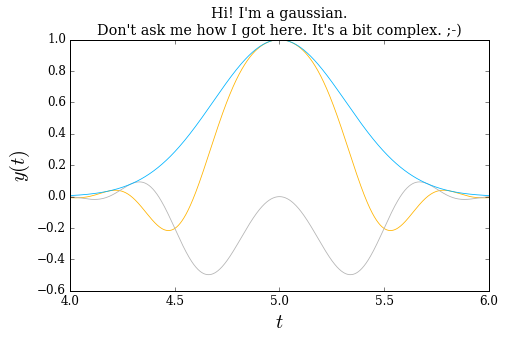

In [135]:
#
t0 = 5
t = linspace(-1,1,1e3)+t0
k = diff( lim(t) )
w = 6*pi/k; g = 10.0/k; x = 0
z = 1j*(w+x) + g
Y = exp( -z*(t-t0)**2 )
Z = [Y.real,Y.imag,abs(Y)]
    
#
figure( figsize = 1.5*array([5,3]) )
clr = rgb(len(Z),reverse=True)
for k in range(len(Z)):
    plot( t, Z[k], color=clr[k] )
xlabel(r'$t$'); ylabel(r'$y(t)$')
title('Hi! I\'m a gaussian.\nDon\'t ask me how I got here. It\'s a bit complex. ;-)')
show()

## Decompose the gaussian using legendre polynomials

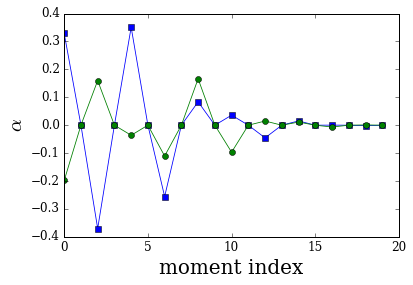

In [136]:
#
N = 20
t_ = linspace(-1,1,len(t))
prod = lambda X,Y: trapz( X*Y.conj(), t_ )
alpha = ydcmp( t_,Y,N=N,fun=Pn, prod=prod )

#
figure()
plot( alpha.real, '-sb' )
plot( alpha.imag, '-og' )
xlabel('moment index')
ylabel(r'$\alpha$')

In [137]:
prod(Pn(2,t_),Pn(2,t_))

0.99999999999999978

In [138]:
A = []
for k in range(len(alpha)):
    A.append( sum( array([ alpha[j]*Pn(j,t_) for j in range(k+1) ]), axis=0 ) )

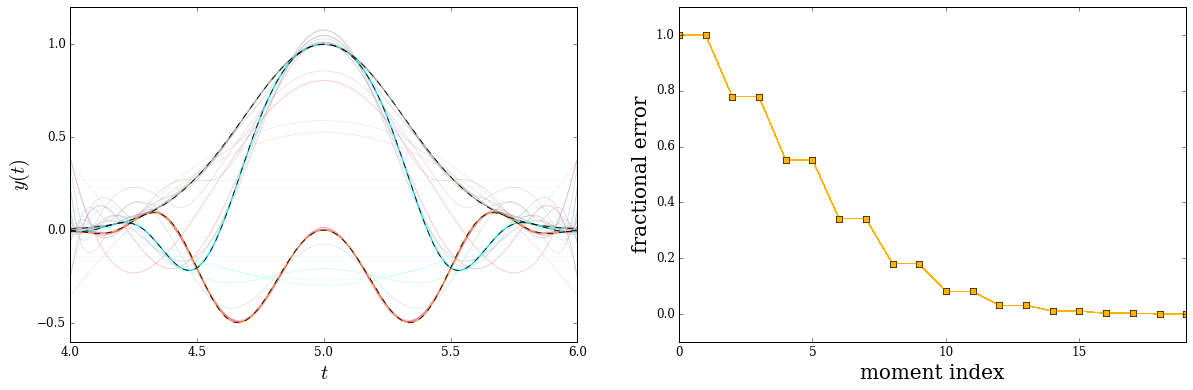

In [142]:

figure( figsize =2*array([10,3]) )
clr = rgb( len(alpha) )

subplot(1,2,1)
for k,a in enumerate(A):
    plot( t, a.imag, color=clr[k], alpha=0.5*(k+1.0)/len(alpha) )
    plot( t, a.real, color=clr[len(alpha)-k-1], alpha=0.5*(k+1.0)/len(alpha) )
    plot( t, abs(a), color=0.5*(clr[len(alpha)-k-1]+clr[k]), alpha=0.5*(k+1.0)/len(alpha) )

plot( t, Y.imag, '--k' )
plot( t, Y.real, '--k' )
plot( t, abs(Y), '--k' )
    
xlabel(r'$t$'); ylabel(r'$y(t)$')

subplot(1,2,2)
res = zeros( array(A).shape )
for k,a in enumerate(A):
    res[k] = std(a-Y)/std(Y)
plot( res, '-s', color=clr[-1], alpha=0.9, linewidth=0.5 )
pylim( arange(len(res)),res )
xlabel( 'moment index' )
ylabel( 'fractional error' )

savefig( 'ydcmp_example.pdf' )
show()